# Preprocess and Sanity Check

In [1]:
%cd ../
%config InlineBackend.figure_format='retina'

import logging
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.getipython import get_ipython
from src.canonical_analysis.subspace_comm import CCARegions
from src.spikeloader import SpikeLoader

sns.set()
get_ipython().run_line_magic("config", "InlineBackend.figure_format='retina'")

/Users/chaichontat/Documents/GitHub/janelia2020


In [2]:
# logging.getLogger().setLevel(logging.INFO)
path_npz = "data/superstim.npz"

In [3]:
# Parameters
path_npz = "data/superstim_TX57.npz"
path_loader = "data/superstim_TX57.hdf5"
path_rf = "data/superstim_TX57.hdf5"
path_gabor = "data/superstim_TX57.hdf5"


In [4]:
if Path(out_file := Path(path_npz).with_suffix(".hdf5")).exists():
    logging.info("HDF5 exists, loading.")
    loader = SpikeLoader.from_hdf5(out_file)
else:
    logging.info("Reading from npz.")
    loader = SpikeLoader.from_npz(path_npz)
    logging.info("Saving to HDF5.")
    loader.save(out_file)

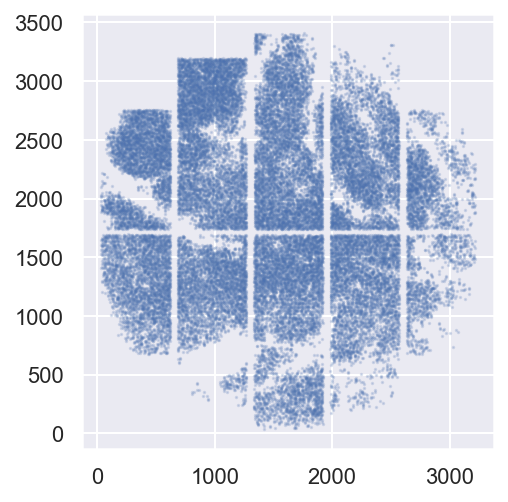

In [5]:
fig, ax = plt.subplots()
ax.scatter(loader.pos.x, loader.pos.y, s=0.5, alpha=0.2)
ax.set_aspect("equal")

In [6]:
print(f"(Stim x Neu): {loader.spks.shape}")
print(f"Number of spont frames: {loader.idx_spont.size}")
print(f"Repeated stims: {loader.get_idx_rep().shape}")

(Stim x Neu): (23708, 39696)
Number of spont frames: 2491
Repeated stims: (1928, 2)


### Correlations between the spiking responses of repeated and non-repeated stimuli.

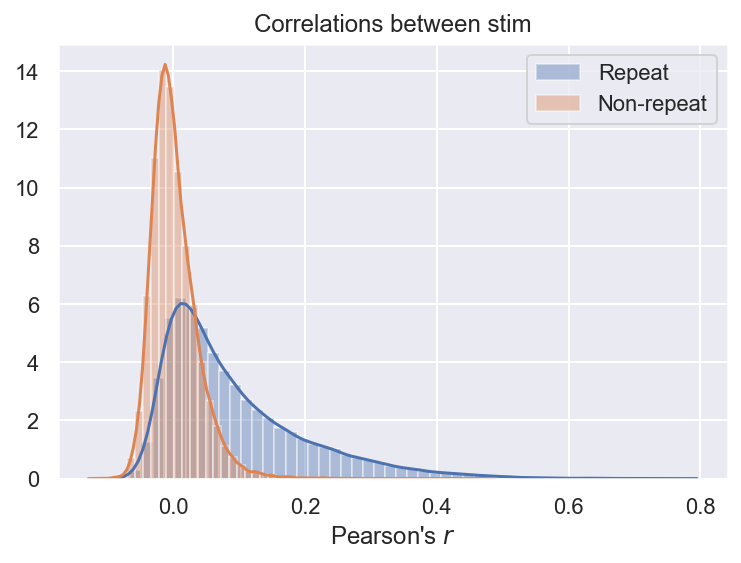

In [7]:
def corr_check(idx1, idx2, name):
    corr = CCARegions.pairwise_inner_prod(loader.S[idx1, :], loader.S[idx2, :], normalize=True)
    ax = sns.distplot(corr, label=name)
    ax.set_title("Correlations between stim")
    ax.set_xlabel("Pearson's $r$")
    return ax


rep = loader.get_idx_rep()
corr_check(rep[:1000, 0], rep[:1000, 1], "Repeat")
corr_check(np.arange(1000), np.arange(1000, 2000), "Non-repeat")
plt.legend()